### MIE1624H Assignment 2
# Twitter Sentiment Analysis
#### By: Sanjif Rajaratnam || Student ID: 999091986 || UtorID: rajara24


The two classifiers that were chosen for the first part of the assignment were Naive Bayes and Logistic Regression. The models for this are from the scikit-learn library. The two classifiers that were chosen for this assignment were the Logistic Regression and Naive Bayes model. These models were obtained from the ski-kit learn Python libraries. The Multinomial and Bernoulli Naive Bayes model and the Logistic Regression model will be analyze in this section. The metrics will also be obtained for the scikit-learn library. Visualization will be done with matplotlib.

### Import Libraries

**Import libraries for math functions, dataframes, and plotting**

In [1]:
import numpy as np # math functions
import pandas as pd # for dataframes
import matplotlib.pyplot as plt # for plotting
from matplotlib import style
%matplotlib inline

**Import sci-kit learn libraries**

In [2]:
from sklearn.cross_validation import train_test_split # To split data into training/test sets
from sklearn.feature_extraction.text import TfidfVectorizer # To create features from tweets
from sklearn.linear_model import LogisticRegression # Logistic Regression model
from sklearn.naive_bayes import MultinomialNB, BernoulliNB # Naive-Bayes models
from sklearn.metrics import confusion_matrix, classification_report # For model metrics
from sklearn.cross_validation import KFold, cross_val_score # For K-Fold validation
from sklearn import metrics # Standard ML metrics

**Plot style**

In [3]:
style.use('ggplot')

## Part 1: Choosing The Optimal Machine Learning Algorithm

The optimal classifier will be chosen by training and testing on the labeled data. A Logistic Regression model, a Multinomial Naive-Bayes model, and a Bernoulli Naive-Bayes model will be built and have their parameters optimized via grid search. The model performance will then be analyzed using the K-Fold technique, and standard statistical metrics.

### 1a) Read in Training Data

**Change working directory to /resources/data**

In [4]:
%cd /resources/data/

/resources/data


**Open classified tweets file and split by line into list**

In [5]:
classifiedTweetsList = open('classified_tweets.txt','r').read().split('\n')
del classifiedTweetsList[-1] # Delete the last row since it's blank

**Initialize arrays to store tweets and true score**

In [6]:
num_tweets = len(classifiedTweetsList)
classified_tw = num_tweets * [0]
truths = np.zeros(num_tweets)

**Loop through each line of file and populate truth and tweet arrays**

In [7]:
i = 0 # Iterator
for tw in classifiedTweetsList:
    # First index of each line in file contained the true score
    # Typecast as int and divide by 4 to get 0 for negative, and 1 for positive
    truths[i] = int(tw[0])/4 
    
    classified_tw[i] = tw[2:] # Store the tweet part of the line in the classifier
    i += 1 # increment iterator

**Create dataframe with classified tweet and true score**

In [8]:
classifiedDF = pd.DataFrame(
    {'tweet':classified_tw,
     'truth':truths}
)
classifiedDF.head()

,truth,tweet
0,0.0,@switchfoot http://twitpic.com/2y1zl - Awww t...
1,0.0,is upset that he can't update his Facebook by ...
2,0.0,@Kenichan I dived many times for the ball. Man...
3,0.0,my whole body feels itchy and like its on fire
4,0.0,@nationwideclass no it's not behaving at all....


**Split the dataframe into data and labels**

In [9]:
X = classifiedDF['tweet']
y = classifiedDF['truth']

**Initialize vectorizer**

This vectorizer will be used to get unique features from the tweets.

In [10]:
vectorizer = TfidfVectorizer(stop_words='english') # Start vectorizer

### 1b) Creating Models

The purpose of this section is to find the optimal algorithm. To do so, a greedy grid search technique is used to built models with various parameters. The test parameters were chosen randomly from some test runs. The built model is then validated using a K-Fold Cross Validation technique since this allows for the testing of a model with less variance than a single train-test set split.

**Initialize results dataframe and testing parameters**

In [11]:
parameter_list = [0.0001,0.001,0.01,0.1,1,5,10]
index = ['model','param value','mean','std dev']
resultsDF = pd.DataFrame(data=np.random.randn(len(parameter_list)*3,4),columns=index)

**Grid Search with K-Fold Cross Validation**

In [12]:
all_features = vectorizer.fit_transform(X)
num_folds = 10
i = 0
for param in parameter_list:
    Kfold = KFold(len(y), n_folds = num_folds)
      
    multiNBModel = MultinomialNB(alpha=param)
    results = cross_val_score(multiNBModel, all_features, y, cv=Kfold)
    print("Multinomial NB Model w/ C=%.3f: Accuracy: %.2f%% (%.2f%%)" % (param,results.mean()*100,results.std()*100))
    resultsDF.iloc[i] = ("MultiNB", param, results.mean(), results.std())
    i +=1 
        
    bernNBModel = BernoulliNB(alpha=param)
    results = cross_val_score(bernNBModel, all_features, y, cv=Kfold)
    print("Bernoulli NB Model w/ C=%.3f: Accuracy: %.2f%% (%.2f%%)" % (param,results.mean()*100,results.std()*100))
    resultsDF.iloc[i] = ("BernNB", param, results.mean(), results.std())
    i +=1  
    
    logModel = LogisticRegression(C=param)
    results = cross_val_score(logModel, all_features, y, cv=Kfold)
    print("Log Model w/ C=%.3f: Accuracy: %.2f%% (%.2f%%)" % (param,results.mean()*100,results.std()*100))
    resultsDF.iloc[i] = ("Log", param, results.mean(), results.std())
    i +=1

Multinomial NB Model w/ C=0.000: Accuracy: 64.05% (3.76%)
Bernoulli NB Model w/ C=0.000: Accuracy: 67.93% (3.72%)
Log Model w/ C=0.000: Accuracy: 0.00% (0.00%)
Multinomial NB Model w/ C=0.001: Accuracy: 64.05% (3.77%)
Bernoulli NB Model w/ C=0.001: Accuracy: 68.01% (3.75%)
Log Model w/ C=0.001: Accuracy: 1.39% (0.78%)
Multinomial NB Model w/ C=0.010: Accuracy: 64.09% (3.85%)
Bernoulli NB Model w/ C=0.010: Accuracy: 68.36% (3.82%)
Log Model w/ C=0.010: Accuracy: 42.95% (1.35%)
Multinomial NB Model w/ C=0.100: Accuracy: 63.92% (3.99%)
Bernoulli NB Model w/ C=0.100: Accuracy: 69.46% (4.13%)
Log Model w/ C=0.100: Accuracy: 64.41% (2.93%)
Multinomial NB Model w/ C=1.000: Accuracy: 57.75% (5.39%)
Bernoulli NB Model w/ C=1.000: Accuracy: 66.02% (5.18%)
Log Model w/ C=1.000: Accuracy: 70.02% (3.09%)
Multinomial NB Model w/ C=5.000: Accuracy: 45.29% (7.16%)
Bernoulli NB Model w/ C=5.000: Accuracy: 34.98% (5.90%)
Log Model w/ C=5.000: Accuracy: 70.24% (2.29%)
Multinomial NB Model w/ C=10.000: Ac

**Results**

In [13]:
resultsDF.sort_values(['model','mean']).head()

,model,param value,mean,std dev
19,BernNB,10.0000,0.103005,0.024157
16,BernNB,5.0000,0.349820,0.059038
13,BernNB,1.0000,0.660230,0.051793
1,BernNB,0.0001,0.679325,0.037201
4,BernNB,0.0010,0.680085,0.037542


In [14]:
resultsDF.groupby('model').describe()[['mean','std dev']]

mean   std dev
model                            
BernNB  count  7.000000  7.000000
        mean   0.550101  0.041326
        std    0.232538  0.011247
        min    0.103005  0.024157
        25%    0.505025  0.037372
        50%    0.679325  0.038238
        75%    0.681862  0.046554
        max    0.694600  0.059038
Log     count  7.000000  7.000000
        mean   0.455452  0.017652
        std    0.321029  0.011304
        min    0.000000  0.000000
        25%    0.221710  0.010651
        50%    0.644145  0.019162
        75%    0.699118  0.026093
        max    0.702365  0.030912
MultiNB count  7.000000  7.000000
        mean   0.570668  0.050953
        std    0.101116  0.017155
        min    0.403175  0.037622
        25%    0.515195  0.038096
        50%    0.639225  0.039933
        75%    0.640480  0.062737
        max    0.640925  0.077448

### 1c) Analyzing Performance of Models

**Plot mean of all algorithms to visually see performance changes with changing parameters**

In [15]:
all_params = resultsDF['param value'].unique()

# Get means
log_mean = resultsDF[resultsDF['model'] == 'Log'].sort_values('param value')['mean'].reset_index()['mean']
multiNB_mean = resultsDF[resultsDF['model'] == 'MultiNB'].sort_values('param value')['mean'].reset_index()['mean']
bernNB_mean = resultsDF[resultsDF['model'] == 'BernNB'].sort_values('param value')['mean'].reset_index()['mean']

# Get standard deviations
log_std = resultsDF[resultsDF['model'] == 'Log'].sort_values('param value')['std dev'].reset_index()['std dev']
multiNB_std = resultsDF[resultsDF['model'] == 'MultiNB'].sort_values('param value')['std dev'].reset_index()['std dev']
bernNB_std = resultsDF[resultsDF['model'] == 'BernNB'].sort_values('param value')['std dev'].reset_index()['std dev']

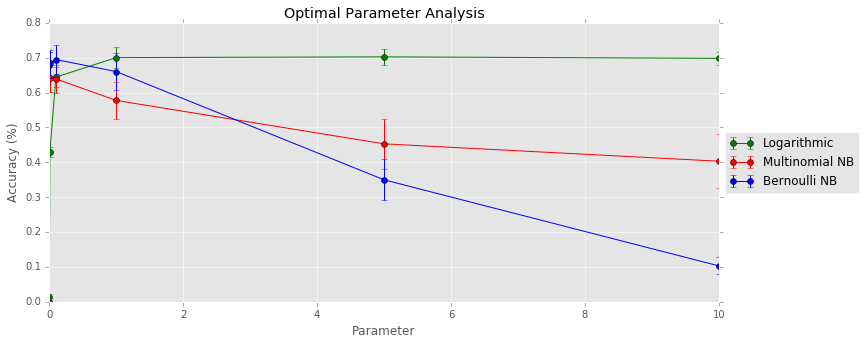

In [16]:
fig, ax = plt.subplots(figsize=(12,5))

ax.errorbar(all_params, log_mean, yerr=log_std, fmt='-o',ecolor='g',color='g') # plot log
ax.errorbar(all_params, multiNB_mean, yerr=multiNB_std, fmt='-o',ecolor='r', color='r') # plot MultiNB
ax.errorbar(all_params, bernNB_mean, yerr=bernNB_std, fmt='-o',ecolor='b', color='b') # plot BernoulliNB

plt.title("Optimal Parameter Analysis")
plt.xlabel('Parameter')
plt.ylabel('Accuracy (%)')
ax.legend(['Logarithmic','Multinomial NB','Bernoulli NB'],loc='center left',bbox_to_anchor=(1.0,0.5))

For the Logarithmic Regression model, as C increases, the model performance increases until c = 3, then it very slowly decreases. Both the Bernoulli and Multinomial Naive Bayes model perform poorly at high alpha values. Both are optimal with alpha values below or equal to 0.1. The logarithmic model has fairly low standard deviation compared to the other two models. The Bernoulli Naive-Bayes model's standard deviation decreases as its alpha parameter increases. The Multinomial Naive-Bayes model's standard deviation increases as its alpha parameter increases.

**Find best model for each algorithm type**

In [17]:
resultsDF.ix[resultsDF.groupby('model')['mean'].idxmax()]

,model,param value,mean,std dev
10,BernNB,0.10,0.694600,0.041315
17,Log,5.00,0.702365,0.022888
6,MultiNB,0.01,0.640925,0.038491


**Get optimal model parameters**

In [18]:
bernNB_param = resultsDF.ix[resultsDF[resultsDF['model'] == 'BernNB'][['mean']].idxmax()]['param value'].values[0]
log_param = resultsDF.ix[resultsDF[resultsDF['model'] == 'Log'][['mean']].idxmax()]['param value'].values[0]
multiNB_param = resultsDF.ix[resultsDF[resultsDF['model'] == 'MultiNB'][['mean']].idxmax()]['param value'].values[0]

**Get the model stats**

In [19]:
models = resultsDF.ix[resultsDF.groupby('model')['mean'].idxmax()]['model'].reset_index()['model']
means = resultsDF.groupby('model')['mean'].max().reset_index()['mean']
std_devs = resultsDF.ix[resultsDF.groupby('model')['mean'].idxmax()]['std dev'].reset_index()['std dev']

**Create errorbar plot with model statistics**

([<matplotlib.axis.XTick at 0x7fe648130160>,
 <a list of 3 Text xticklabel objects>)

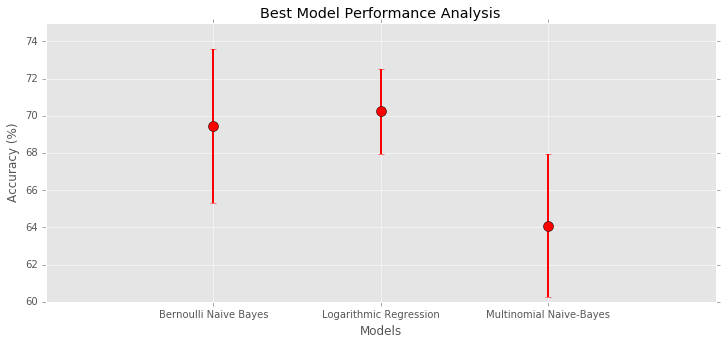

In [20]:
fig2, ax2 = plt.subplots(figsize=(12,5))
ax2.errorbar(np.arange(3), means*100, std_devs*100, fmt='ok', color='r', lw=2,markersize=10)
plt.title("Optimal Model Performance Analysis")
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.xlim(-1,3)
plt.ylim(60,75)
plt.xticks(np.arange(3),['Bernoulli Naive Bayes','Logarithmic Regression','Multinomial Naive-Bayes'])

From the errorplot seen above, it is seen that the Logarithmic model has the best mean performance and the lowest standard deviation. The max of the Bernoulli Model is greater than the Log model but its standard deviation is much worse than the Logarithmic model. This means that its performance can vary vastly. The optimal algorithm in this case is the Logarithmic model.

### 1d) Machine Learning Performance Metrics

Get standard machine learning metrics on the optimal machine learning models

**Create training and test sets**

Use the common convention of 33% for testing and 67% for training. Use the vectorizer to transform the tweets to Tfidf features.

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33)
feature_train = vectorizer.fit_transform(X_train)
feature_test = vectorizer.transform(X_test)

**Train and evalute Logarithmic Regression model**

In [22]:
logModel = LogisticRegression(C=log_param)
logModel.fit(feature_train,y_train)
logPredictions = logModel.predict(feature_test)

print("Log Model Classification Report")
print(classification_report(y_test, logPredictions))
print("Log Model Confusion Matrix")
print(confusion_matrix(y_test,logPredictions))

TN = confusion_matrix(y_test, logPredictions)[0][0]
FP = confusion_matrix(y_test, logPredictions)[0][1]
FN = confusion_matrix(y_test, logPredictions)[1][0]
TP = confusion_matrix(y_test, logPredictions)[1][1]
total = TN + FP + FN + TP
# Determine accuracy and misclassification rate
accuracy = (TP + TN) / total * 100
misclassification_rate = (FP + FN) / total * 100
print("\n")
print("Accuracy:",accuracy, '%')
print("Misclassification Rate:",misclassification_rate,'%')
print('\n')
print('MAE:', metrics.mean_absolute_error(y_test, logPredictions)*100, '%')
print('MSE:', metrics.mean_squared_error(y_test, logPredictions)*100, '%')
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, logPredictions))*100, '%')

Log Model Classification Report
             precision    recall  f1-score   support

        0.0       0.77      0.75      0.76     33054
        1.0       0.76      0.78      0.77     32946

avg / total       0.76      0.76      0.76     66000

Log Model Confusion Matrix
[[24829  8225]
 [ 7350 25596]]


Accuracy: 76.4015151515 %
Misclassification Rate: 23.5984848485 %


MAE: 23.5984848485 %
MSE: 23.5984848485 %
RMSE: 48.5782717359 %


**Train and evaluate the Multinomial Naive Bayes model**

In [23]:
multiNBModel = MultinomialNB(alpha=multiNB_param)
multiNBModel.fit(feature_train,y_train)
multiNBPredictions = multiNBModel.predict(feature_test)

print("Multinomial Naive Bayes Model Classification Report")
print(classification_report(y_test, multiNBPredictions))
print("Multinomial Naive Bayes Model Confusion Matrix")
print(confusion_matrix(y_test,multiNBPredictions))

TN = confusion_matrix(y_test, multiNBPredictions)[0][0]
FP = confusion_matrix(y_test, multiNBPredictions)[0][1]
FN = confusion_matrix(y_test, multiNBPredictions)[1][0]
TP = confusion_matrix(y_test, multiNBPredictions)[1][1]
total = TN + FP + FN + TP
# Determine accuracy and misclassification rate
accuracy = (TP + TN) / total * 100
misclassification_rate = (FP + FN) / total * 100
print("\n")
print("Accuracy:",accuracy, '%')
print("Misclassification Rate:",misclassification_rate,'%')
print('\n')
print('MAE:', metrics.mean_absolute_error(y_test, multiNBPredictions)*100, '%')
print('MSE:', metrics.mean_squared_error(y_test, multiNBPredictions)*100, '%')
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, multiNBPredictions))*100, '%')

Multinomial Naive Bayes Model Classification Report
             precision    recall  f1-score   support

        0.0       0.71      0.75      0.73     33054
        1.0       0.73      0.70      0.71     32946

avg / total       0.72      0.72      0.72     66000

Multinomial Naive Bayes Model Confusion Matrix
[[24672  8382]
 [10037 22909]]


Accuracy: 72.0924242424 %
Misclassification Rate: 27.9075757576 %


MAE: 27.9075757576 %
MSE: 27.9075757576 %
RMSE: 52.8276213335 %


**Train and evaluate the Bernoulli Naive Bayes Model**

In [24]:
bernNBModel = BernoulliNB(alpha=bernNB_param)
bernNBModel.fit(feature_train,y_train)
bernNBPredictions = bernNBModel.predict(feature_test)

print("Bernoulli Naive Bayes Model Classification Report")
print(classification_report(y_test, bernNBPredictions))
print("Bernoulli Naive Bayes Model Confusion Matrix")
print(confusion_matrix(y_test,bernNBPredictions))

TN = confusion_matrix(y_test, bernNBPredictions)[0][0]
FP = confusion_matrix(y_test, bernNBPredictions)[0][1]
FN = confusion_matrix(y_test, bernNBPredictions)[1][0]
TP = confusion_matrix(y_test, bernNBPredictions)[1][1]
total = TN + FP + FN + TP
# Determine accuracy and misclassification rate
accuracy = (TP + TN) / total * 100
misclassification_rate = (FP + FN) / total * 100
print("\n")
print("Accuracy:",accuracy, '%')
print("Misclassification Rate:",misclassification_rate,'%')
print('\n')
print('MAE:', metrics.mean_absolute_error(y_test, bernNBPredictions)*100, '%')
print('MSE:', metrics.mean_squared_error(y_test, bernNBPredictions)*100, '%')
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, bernNBPredictions))*100, '%')

Bernoulli Naive Bayes Model Classification Report
             precision    recall  f1-score   support

        0.0       0.72      0.78      0.75     33054
        1.0       0.76      0.70      0.73     32946

avg / total       0.74      0.74      0.74     66000

Bernoulli Naive Bayes Model Confusion Matrix
[[25680  7374]
 [ 9932 23014]]


Accuracy: 73.7787878788 %
Misclassification Rate: 26.2212121212 %


MAE: 26.2212121212 %
MSE: 26.2212121212 %
RMSE: 51.20665203 %


The Logarithmic Regression model had the least error of the 3 models regardless of the method used to calculate error. It also has the highest accuracy of the three models for the given test set. 

### From the above analysis, it was determined that the best algorithm for this analysis is the Logarithmic Regression Classification algorithm. It will be used from here on for the second part of the assignment.

## Part 2: Categorize Unclassified Tweets by Political Parties

**Read in unclassified data**

In [25]:
unclassifiedTweetsList = open('unclassified_tweets.txt','r').read().split('\n')
del unclassifiedTweetsList[-1] # Delete the last row since it's blank

### 2a) Create Sets of Party Related Words

The following words were found by searching through Twitter pages. Firstly, the party name was searched for on Twitter, and then related hashtags were found in the results and added to the relevant set. Then those hashtags were search for, and its related hashtags were added to the relevant set. This process was continued until no more specific hashtags could be found.

In [26]:
NDP = set(['ndp','tommulcair','mulcair','ndpldr','ndleg','pj17','thomasmulcair'])
Liberal = set(['liberal','trudeau','justintrudeau','realchange','lpc'])
Conservative = set(['conservative','cpcldr','cpc','m103','stevenharper','harper','tories','ronaambrose','ambrose'])

### 2b) Function to Assign Party To Tweets

In [27]:
def getParty(tw_unigram):
    # Start some counters
    num_ndp_words = 0
    num_lib_words = 0
    num_cons_words = 0
    
    # Loop through unigrams
    for word in tw_unigram:
        if word.lower() in Liberal:
            num_lib_words += 1
        elif word.lower() in NDP:
            num_ndp_words += 1
        elif word.lower() in Conservative:
            num_cons_words += 1
    
    party = ''
    
    if ( num_lib_words > num_cons_words and num_lib_words > num_ndp_words ):
        party = 'Liberal'
    elif ( num_cons_words > num_lib_words and num_cons_words > num_ndp_words ):
        party = 'Conservative'
    elif ( num_ndp_words > num_lib_words and num_ndp_words > num_cons_words ):
        party = 'NDP'
    else:
        party = 'Unknown'
        
    return party

### 2c) Categorize Tweets By Party

**Initialize anaylzer to tokenize tweets**

In [28]:
analyzer = vectorizer.build_analyzer()

**Initialize list to store parties**

In [29]:
party = [0] * len(unclassifiedTweetsList)

**Categorize tweets by party**

In [30]:
for i in range(len(unclassifiedTweetsList)):
    party[i] = getParty(analyzer(unclassifiedTweetsList[i]))

## Part 3: Predict Scores for Unclassified Tweets

**Transform tweets into features using Tfidfvectorizer**

In [31]:
features_unclassified = vectorizer.transform(unclassifiedTweetsList)
score = logModel.predict(features_unclassified)

**Write into dataframe**

In [32]:
unclassifiedDF = pd.DataFrame(
    {'tweet':unclassifiedTweetsList,
     'party':party,
     'score':score
    }
)
unclassifiedDF.head()

,party,score,tweet
0,NDP,0.0,﻿living the dream. #cameraman #camera #camerac...
1,Liberal,1.0,justin #trudeau's reasons for thanksgiving. to...
2,Unknown,0.0,@themadape butt…..butt…..we’re allergic to l...
3,Unknown,1.0,2 massive explosions at peace march in #turkey...
4,NDP,0.0,#mulcair suggests there’s bad blood between hi...


**Remove Unknown tweets**

These tweets could not be categorized so they will be ignored for analysis

In [33]:
unclassifiedDF = unclassifiedDF[unclassifiedDF['party'] != 'Unknown'].reset_index()[['party','score','tweet']]
unclassifiedDF.head()

,party,score,tweet
0,NDP,0.0,﻿living the dream. #cameraman #camera #camerac...
1,Liberal,1.0,justin #trudeau's reasons for thanksgiving. to...
2,NDP,0.0,#mulcair suggests there’s bad blood between hi...
3,Conservative,1.0,harper gave $8m to help other countries' get r...
4,NDP,0.0,#ready4change #ndp #tm4pm fb.me/53nxi25ue


## Part 4: Political Insights

**Overall standard statistical analysis**

In [34]:
unclassifiedDF.groupby('party').describe()

score
party                         
Conservative count  490.000000
             mean     0.608163
             std      0.488659
             min      0.000000
             25%      0.000000
             50%      1.000000
             75%      1.000000
             max      1.000000
Liberal      count  596.000000
             mean     0.783557
             std      0.412166
             min      0.000000
             25%      1.000000
             50%      1.000000
             75%      1.000000
             max      1.000000
NDP          count  328.000000
             mean     0.740854
             std      0.438836
             min      0.000000
             25%      0.000000
             50%      1.000000
             75%      1.000000
             max      1.000000

**Write important stats into dataframe**

In [35]:
party_stats = unclassifiedDF.groupby('party').mean()
party_stats['std'] = unclassifiedDF.groupby('party').std()
party_stats['count'] = unclassifiedDF.groupby('party').count()['score']
party_stats['mean'] = party_stats['score']
party_stats['tweet %'] = party_stats['count']/party_stats['count'].sum()*100
party_stats = party_stats.reset_index().drop(labels='score',axis=1)
party_stats

,party,std,count,mean,tweet %
0,Conservative,0.488659,490,0.608163,34.653465
1,Liberal,0.412166,596,0.783557,42.149929
2,NDP,0.438836,328,0.740854,23.196605


**Analyze each party's buzz**

In [36]:
print("The %s party had the most buzz with about %.2f%% of the party related tweets." 
      % (party_stats.ix[party_stats['tweet %'].idxmax()]['party'], 
         party_stats.ix[party_stats['tweet %'].idxmax()]['tweet %']))

print("The %s party had the least buzz with about %.2f%% of the party related tweets."
      % (party_stats.ix[party_stats['tweet %'].idxmin()]['party'], 
         party_stats.ix[party_stats['tweet %'].idxmin()]['tweet %']))

The Liberal party had the most buzz with about 42.15% of the party related tweets.
The NDP party had the least buzz with about 23.20% of the party related tweets.


**Analyze which party is the most and least liked**

In [37]:
print("The %s party had the most liked with a postive-negative tweet ratio of %.2f%%." 
      % (party_stats.ix[party_stats['mean'].idxmax()]['party'], 
         party_stats.ix[party_stats['mean'].idxmax()]['mean']*100))

print("The %s party had the least liked with a postive-negative tweet ratio of %.2f%%."
      % (party_stats.ix[party_stats['mean'].idxmin()]['party'], 
         party_stats.ix[party_stats['mean'].idxmin()]['mean']*100))

The Liberal party had the most liked with a postive-negative tweet ratio of 78.36%.
The Conservative party had the least liked with a postive-negative tweet ratio of 60.82%.


**Plot distribution of sentiments for each party**

([<matplotlib.axis.XTick at 0x7fe646efeb70>,
 <a list of 3 Text xticklabel objects>)

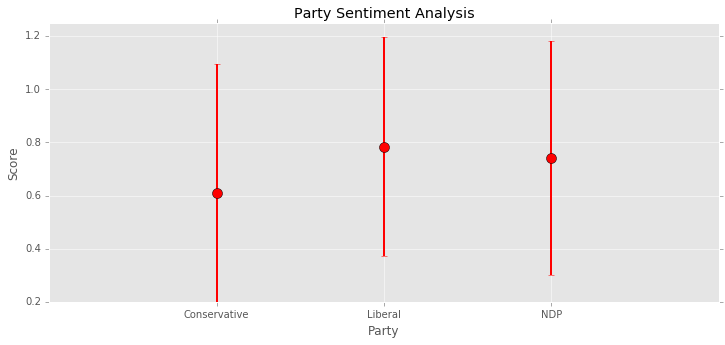

In [38]:
fig3, ax3 = plt.subplots(figsize=(12,5))
ax3.errorbar(np.arange(3), party_stats['mean'], party_stats['std'], fmt='ok', color='r', lw=2,markersize=10)
plt.title("Party Sentiment Analysis")
plt.xlabel('Party')
plt.ylabel('Score')
plt.xlim(-1,3)
plt.ylim(0.2,1.25)
plt.xticks(np.arange(3),party_stats['party'])

The Liberal Party performed the best with the highest mean score and lowest standard deviation. The NDP party was close behind. The Conservative party performed the worst with the lowest mean score and the highest standard deviation.

## Part 5: Conclusion 

**Conclusion from above results**

The Liberal and NDP parties have very similar distributions but the Liberal party was more liked and had almost twice as many tweets than the NDP party. Overall, it shows the Liberal party had the most positive attention and the most likely to win the Canadian Federal Election. The Conservative party also got more positive attention than the NDP party even though its positive-negative ratio was worse than the NDP party. The NDP party had the least attention overall.

**Actual results from the 2015 Canadian Election**

This was reflected in the actual 2015 Canadian Federal election because Justin Trudeau and the Liberal party won the election and had the most seats. The Conservative party and Steven Harper got second most votes with the second most seats. They however lost the most seats from what they had prior. The NDP was third with the least votes and least seats.

Ref: https://en.wikipedia.org/wiki/Results_of_the_Canadian_federal_election,_2015